In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PotatoVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2539 files belonging to 4 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Unknown']

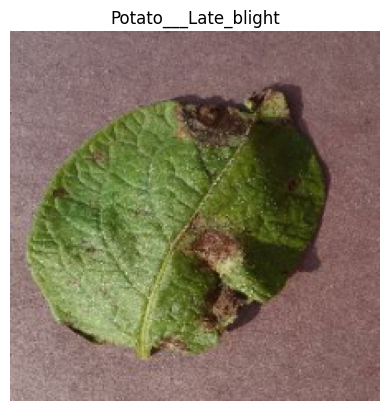

In [5]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

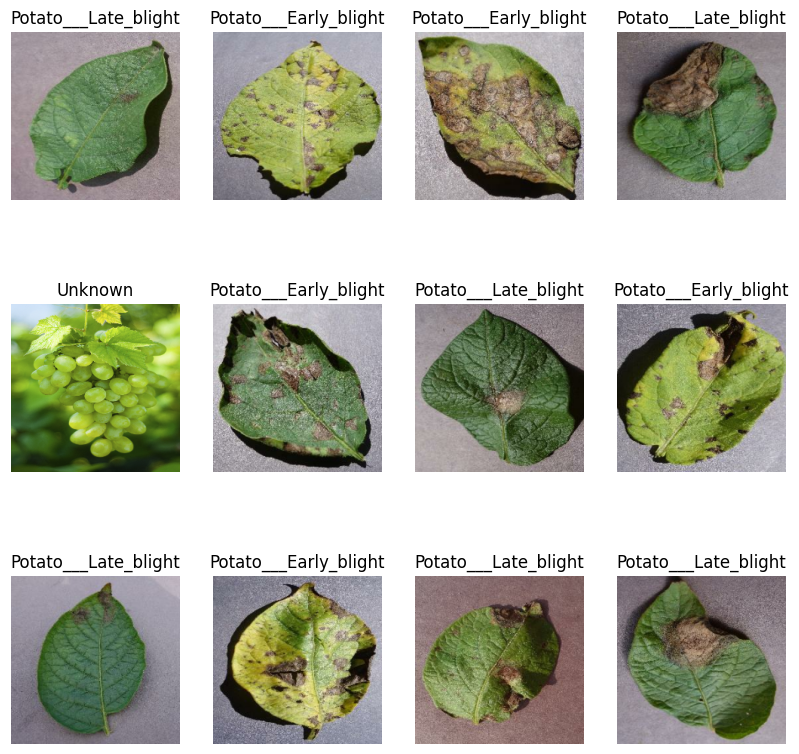

In [6]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
def get_dataset_partitions_tf(dataset, training_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(dataset)
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed = 12)
    training_size = int(training_split * ds_size)
    val_size = int(val_split * ds_size)
    training_ds = dataset.take(training_size)
    val_ds = dataset.skip(training_size).take(val_size)
    test_ds = dataset.skip(training_size).skip(val_size)
    return training_ds, val_ds, test_ds

training_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
len(training_ds)

64

In [9]:
len(val_ds)

8

In [10]:
len(test_ds)

8

In [11]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
    ])
model.build(input_shape = input_shape)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 52, 52, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 10, 10, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 1600)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,900 (909.77 KB)

 Trainable params: 232,900 (909.77 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [17]:
history = model.fit(
    training_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.4382 - loss: 1.2172 - val_accuracy: 0.6094 - val_loss: 1.0575
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.7601 - loss: 0.6622 - val_accuracy: 0.8203 - val_loss: 0.4730
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.8230 - loss: 0.4527 - val_accuracy: 0.8984 - val_loss: 0.2843
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8868 - loss: 0.2842 - val_accuracy: 0.9062 - val_loss: 0.2575
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9075 - loss: 0.2548 - val_accuracy: 0.9258 - val_loss: 0.1966
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9205 - loss: 0.2033 - val_accuracy: 0.9023 - val_loss: 0.1993
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9235 - loss: 0.2133 - val_accuracy: 0.9414 - val_loss: 0.1590
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9139 - loss: 0.1957 - val_accuracy: 0.9336 - v

In [18]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 912ms/step - accuracy: 0.9370 - loss: 0.1778


In [19]:
scores

[0.14849314093589783, 0.94140625]

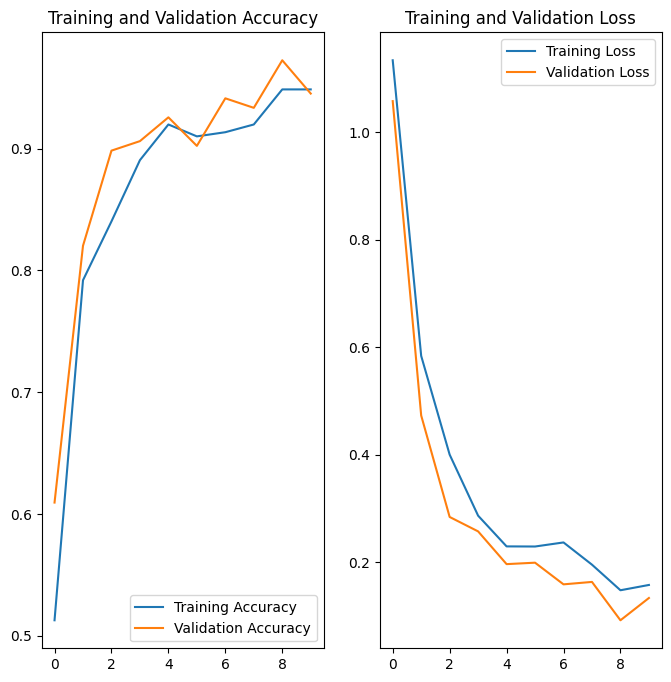

In [20]:
# Plotting a matplotlib chart
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual_label: Potato___Late_blight


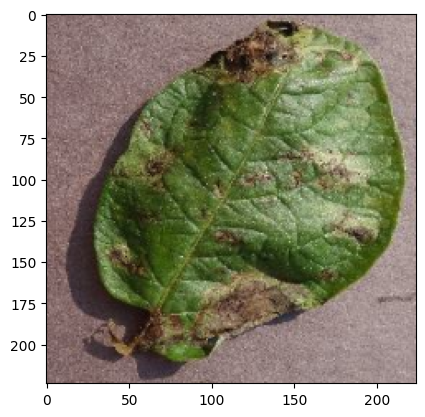

In [21]:
# Getting the actual label of our image
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual_label:", class_names[first_label])

In [22]:
batch_prediction = model.predict(image_batch)
# converting it to a class name
print("predicted_leabel:", class_names[np.argmax(batch_prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted_leabel: Potato___Late_blight


In [23]:
# function that takes the model and image and highlights what is the predicted class and confidence
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


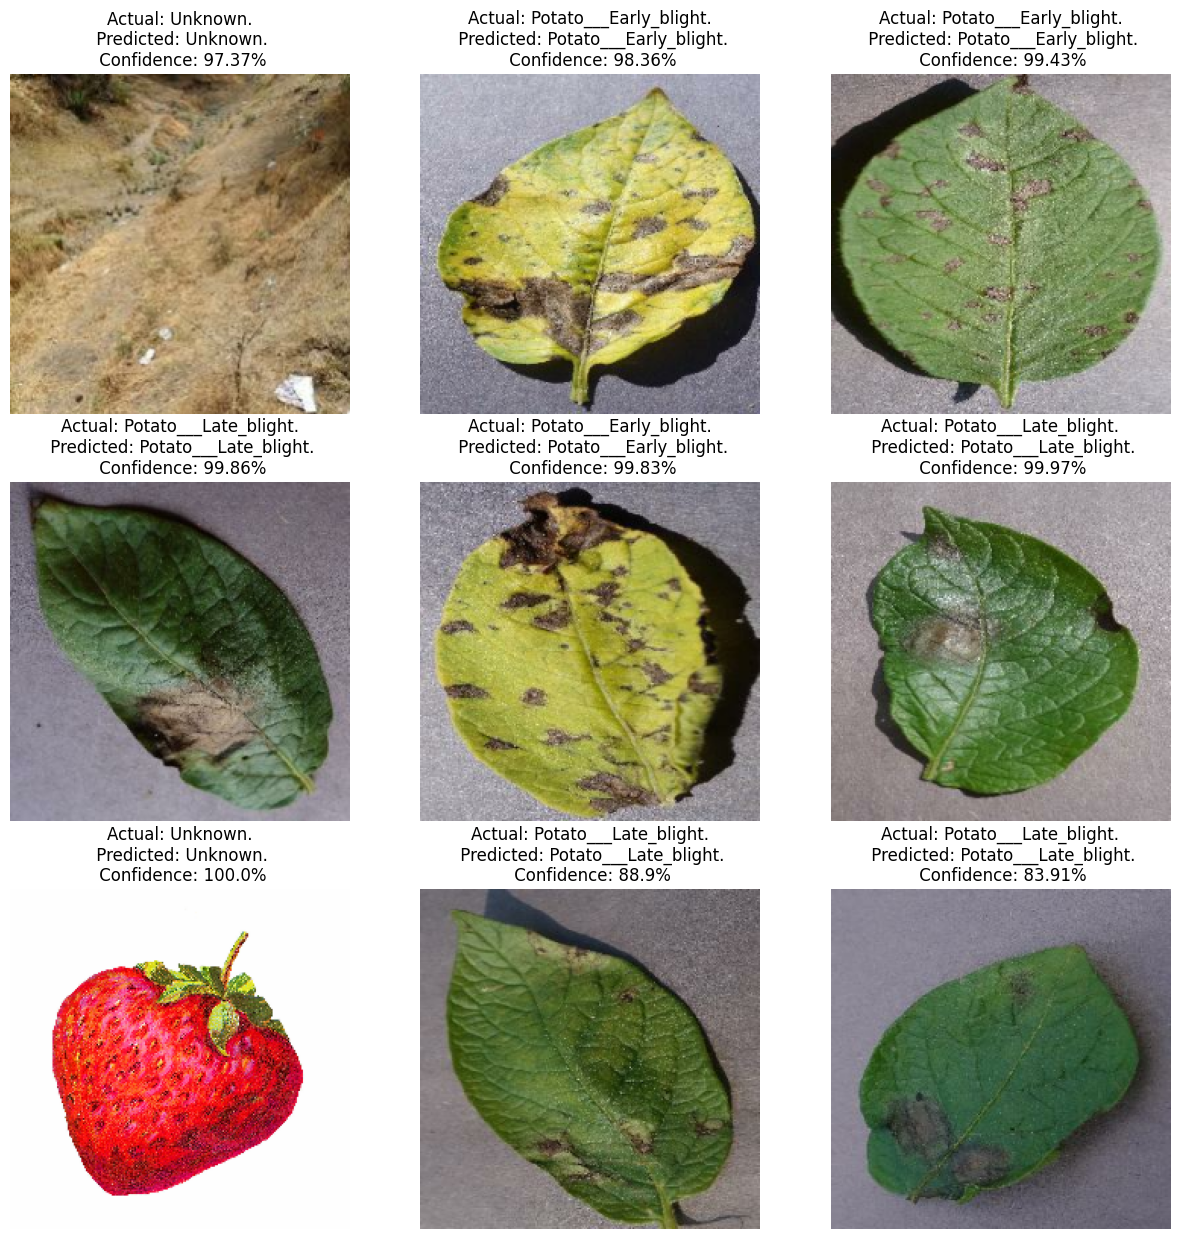

In [24]:
# Taking images from the test_ds and using the predict model to predict images and highlight the confidence
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):
   for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i].numpy()]
        plt.title(f"Actual: {actual_class}.\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [27]:
import os

model_version = max([int(i.split('.')[0]) for i in os.listdir("../potato") if i.split('.')[0].isdigit()] + [0]) + 1
model.export(f"../potato/{model_version}")

INFO:tensorflow:Assets written to: ../potato/1\assets


INFO:tensorflow:Assets written to: ../potato/1\assets


Saved artifact at '../potato/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1572459800608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572459800784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572459801840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572459803072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572459802720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572459803600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572459802016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572459804480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572459802368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572459804832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572459804304: TensorSpec(shape=(), dty